<a href="https://colab.research.google.com/github/MonSan436/Proyecto-Algoritmo-QR/blob/main/Proyecto_algoritmo_QR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Calculos Proyecto algoritmo QR.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la
import scipy.io as io
import scipy.sparse as sp
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
import pprint
import urllib.request
from timeit import default_timer
import scipy.special as spe
from scipy.linalg import hessenberg 

En este colab se van a hacer algunos calculos referentes al proyecto del algoritmo QR, algunos de estos estarán inmersos en el documento y otros se dejarán dentro de este bloc de notas para que aquel que este interesado pueda verlos.

#Factorización QR

En esta sección se presentan algunos calculos hechos con la factorización QR.

In [ ]:
'''Primer ejemplo de la factorización QR del documento'''
A = np.array([[2,7],[4,8]])
print("A:")
print(A)
Q,R = la.qr(A)
print("R:")
print(R)
print("Q:")
print(Q)

A:
[[2 7]
 [4 8]]
R:
[[-4.4721 -10.2859]
 [ 0.0000 -2.6833]]
Q:
[[-0.4472 -0.8944]
 [-0.8944  0.4472]]


In [ ]:
'''Segundo ejemplo de la factorización QR del documento'''
A=np.array([[3,10,16],[0,2,5],[4,1,1]])
Q,R = la.qr(A)
print("R:")
print(R)
print("Q:")
print(Q)


R:
[[-5.0000 -6.8000 -10.4000]
 [ 0.0000 -7.6655 -13.0820]
 [ 0.0000  0.0000  1.6437]]
Q:
[[-0.6000 -0.7723 -0.2087]
 [-0.0000 -0.2609  0.9654]
 [-0.8000  0.5792  0.1565]]


Ahora se va a trabajar con la matriz sparsa https://suitesparse-collection-website.herokuapp.com/mat/Schulthess/N_biocarta.mat para esto importa esta matriz a este bloc de notas para poder trabajar con ella.

In [ ]:
import requests
# Import to a python dictionary
url = "https://suitesparse-collection-website.herokuapp.com/mat/Schulthess/N_biocarta.mat"
file = requests.get(url, allow_redirects=True)

open('bio.mat', 'wb').write(file.content)

11110

Se va a hacer el gráfico de dispersión de esta matriz.

[[ 0.0000  0.0000  0.0000 ...  0.0000  0.0000  0.0000]
 [ 0.0000  0.0000  0.0000 ...  0.0000  0.0000  0.0000]
 [ 0.0000  0.0000  0.0000 ...  1.0000  1.0000  1.0000]
 ...
 [ 0.0000  0.0000  0.0000 ...  0.0000  0.0000  0.0000]
 [ 0.0000  0.0000  0.0000 ...  0.0000  0.0000  0.0000]
 [ 0.0000  0.0000  0.0000 ...  0.0000  0.0000  0.0000]]


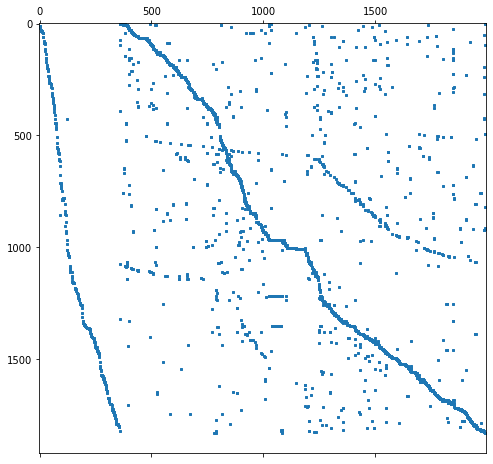

In [ ]:
mat = io.loadmat('bio')
#print(mat)
A=mat['Problem']['A']
B=A[0]
C=B[0]
D=sp.csr_matrix.toarray(C)
print(D)
#print(type(D))
plt.figure(figsize=(8,8))
plt.spy(D,markersize=2)
plt.show()

Ahora se va a calcular la factorización QR de esta matriz, y se hace la gráfica de dispersión cada una de las matrices Q y R.

Q:
[[ 0.0000  0.0000  0.0000 ...  0.0000  0.0000  0.0000]
 [-0.0000  0.0000  0.0000 ...  0.0000  0.0000  0.0000]
 [-0.0000 -0.0000  0.0000 ...  0.0000  0.0000  0.0000]
 ...
 [-0.0000 -0.0000 -0.0000 ...  1.0000  0.0000  0.0000]
 [-0.0000 -0.0000 -0.0000 ...  0.0000  1.0000  0.0000]
 [-0.0000 -0.0000 -0.0000 ...  0.0000  0.0000  1.0000]]
R:
[[-1.0000  0.0000  0.0000 ...  0.0000  0.0000  0.0000]
 [ 0.0000 -1.0000  0.0000 ...  0.0000  0.0000  0.0000]
 [ 0.0000  0.0000 -1.0000 ...  0.0000  0.0000  0.0000]
 ...
 [ 0.0000  0.0000  0.0000 ...  0.0000  0.0000  0.0000]
 [ 0.0000  0.0000  0.0000 ...  0.0000  0.0000  0.0000]
 [ 0.0000  0.0000  0.0000 ...  0.0000  0.0000  0.0000]]


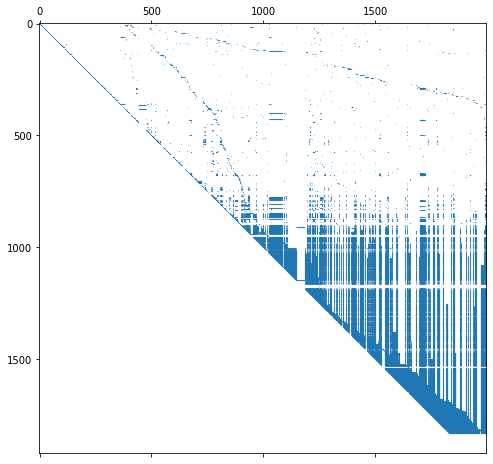

In [ ]:
'''Acá se cálcula la factorización QR de la matriz N_biocart'''
Q,R = la.qr(D)
print("Q:")
print(Q)
print("R:")
print(R)
plt.figure(figsize=(8,8))
plt.spy(R,markersize=0.1)
plt.show()

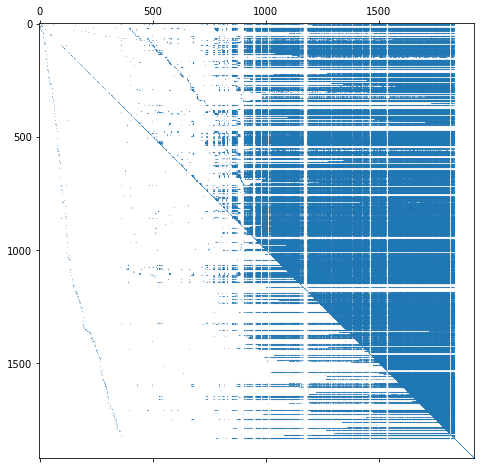

In [ ]:
plt.figure(figsize=(8,8))
plt.spy(Q,markersize=0.1)
plt.show()



Q*R= [[ 0.0000  0.0000  0.0000 ...  0.0000  0.0000  0.0000]
 [ 0.0000  0.0000  0.0000 ... -0.0000 -0.0000 -0.0000]
 [ 0.0000  0.0000  0.0000 ...  1.0000  1.0000  1.0000]
 ...
 [ 0.0000  0.0000  0.0000 ...  0.0000  0.0000  0.0000]
 [ 0.0000  0.0000  0.0000 ...  0.0000  0.0000  0.0000]
 [ 0.0000  0.0000  0.0000 ...  0.0000  0.0000  0.0000]]


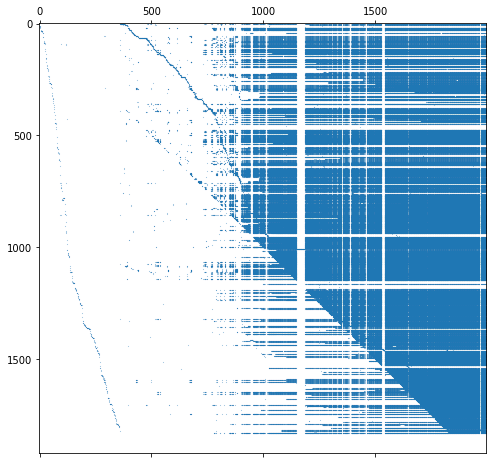

In [ ]:
print('Q*R=',Q@R)
plt.figure(figsize=(8,8))
plt.spy(Q@R,markersize=0.1)
plt.show()

Note que al hacer el producto de la matriz Q con R, no resulta ser la misma matriz de dispersión que se esta trabajando, la causa de esto puede ser debido a errores de cálculo de punto flotante, (errores de redondeo)


#Ejemplos básicos del algoritmo QR

En esta sección se darán ejemplos básicos del algoritmo QR para la obtención de valores propios de una matriz, así como se tratará de hacer una idea a la rapidez de este algoritmo, usado desde su forma básica (Francis).

In [ ]:
"Algoritmo QR-Francis"

A = np.array([[2,7],[4,8]])
M=20
for j in range(0,M):
  print("A(",j,"):")
  print(A)
  Q,R = la.qr(A)
  d=[]
  for i in range(0,len(A)):
    if R[i][i] != 0:
      d.append(R[i][i]/la.norm(R[i][i]))
    else:
      d.append(1)
  D=np.diag(d)
  B=np.linalg.inv(D)
  Q=np.dot(Q,D)
  R=np.dot(B,R)
  print("R:")
  print(R)
  print("Q:")
  print(Q)
  A=np.dot(R,Q)
  print("\n"*3)

A( 0 ):
[[2 7]
 [4 8]]
R:
[[ 4.4721  10.2859]
 [ 0.0000  2.6833]]
Q:
[[ 0.4472  0.8944]
 [ 0.8944 -0.4472]]




A( 1 ):
[[ 11.2000 -0.6000]
 [ 2.4000 -1.2000]]
R:
[[ 11.4543 -0.8381]
 [ 0.0000  1.0476]]
Q:
[[ 0.9778  0.2095]
 [ 0.2095 -0.9778]]




A( 2 ):
[[ 11.0244  3.2195]
 [ 0.2195 -1.0244]]
R:
[[ 11.0266  3.1985]
 [ 0.0000  1.0883]]
Q:
[[ 0.9998  0.0199]
 [ 0.0199 -0.9998]]




A( 3 ):
[[ 11.0881 -2.9783]
 [ 0.0217 -1.0881]]
R:
[[ 11.0881 -2.9805]
 [ 0.0000  1.0822]]
Q:
[[ 1.0000  0.0020]
 [ 0.0020 -1.0000]]




A( 4 ):
[[ 11.0822  3.0021]
 [ 0.0021 -1.0822]]
R:
[[ 11.0822  3.0019]
 [ 0.0000  1.0828]]
Q:
[[ 1.0000  0.0002]
 [ 0.0002 -1.0000]]




A( 5 ):
[[ 11.0828 -2.9998]
 [ 0.0002 -1.0828]]
R:
[[ 11.0828 -2.9998]
 [ 0.0000  1.0828]]
Q:
[[ 1.0000  0.0000]
 [ 0.0000 -1.0000]]




A( 6 ):
[[ 11.0828  3.0000]
 [ 0.0000 -1.0828]]
R:
[[ 11.0828  3.0000]
 [ 0.0000  1.0828]]
Q:
[[ 1.0000  0.0000]
 [ 0.0000 -1.0000]]




A( 7 ):
[[ 11.0828 -3.0000]
 [ 0.0000 -1.0828]]
R:
[[ 11.0828 -3.0

Acá se muestran algunos ejemplos de como reducir una matriz $A$ a una matriz de Hessenberg, se recuerda que una matriz de Hessenberg tiene la forma
$$
\begin{pmatrix}
    \times & \times & \times & \times  & \cdots & \times & \times & \times & \times\\
    \times & \times & \times & \times & \cdots & \times & \times & \times & \times \\
    0 & \times & \times & \times & \cdots & \times & \times & \times & \times \\
     0 & 0 & \times & \times & \cdots & \times & \times & \times & \times \\
     \vdots & \vdots & \ddots & & \ddots & \ddots & \vdots & \vdots & \vdots  \\
     0 & 0 & 0 & 0 & \ddots & \times  & \times & \times & \times \\
       0 & 0 & 0 & 0 & \ddots & \times  & \times & \times & \times \\
         0 & 0 & 0 & 0 & \vdots & 0  & \times & \times & \times \\
           0 & 0 & 0 & 0 & \vdots & 0  & 0 & \times & \times \\
    \end{pmatrix}_{n\times n}
$$
para esto se hace uso de la libreria $\textbf{scipy.linalg.hessenberg}$.

Considere entonces las siguientes matrices.
$i$)$A=\begin{pmatrix}
2 & 5 & 8 & 7 \\
4 & 2 & 1 & 5\\
7 & 5 & 6 & 7 \\
5 & 1 & 4 & 8
\end{pmatrix}$

$ii$)$B$ será una matriz aleatoria de tamaño $6\times 6$.


In [ ]:
'''Ejemplo 1 '''
from scipy.linalg import hessenberg
A = np.array([[2, 5, 8, 7], [4, 2, 1, 5], [7, 5, 6, 7], [5, 1, 4, 8]])
H, Q = hessenberg(A, calc_q=True)
print('H:')
print(H)
'''Ejemplo 2'''
B = np.random.rand(6,6)
#print('B:')
#print(B)
H, Q= hessenberg(B,calc_q=True)
print('H:')
print(H)

H:
[[ 2.0000 -11.7004 -0.0832  1.0455]
 [-9.4868  13.3222  1.3987 -5.1549]
 [ 0.0000  1.5622  0.7437  1.1712]
 [ 0.0000  0.0000 -2.6235  1.9340]]
H:
[[ 0.8624 -0.6317 -0.6857  0.2049  0.4043  0.1050]
 [-0.8384  2.2663  1.3570  0.2723  0.3264 -0.2380]
 [ 0.0000  1.2618  0.6578  0.5481  0.1027 -0.2378]
 [ 0.0000  0.0000  1.0174 -0.1267  0.0408 -0.1338]
 [ 0.0000  0.0000  0.0000  0.1292  0.3915 -0.2173]
 [ 0.0000  0.0000  0.0000  0.0000 -0.4427  0.1316]]
